## 9 - Confirmatory Factor Analysis
### Fitting latent variables onto data

We continue our journey in multivariate data analysis with the sister technique of exploratory factor analysis - **confirmatory factor analysis** (CFA). Much like EFA, CFA is a framework that draws no distinction between what variables are predictors or outcomes. But unlike EFA, the aim of CFA is to instead a-priori specify a set of latent variables and how some observed data might have given rise to them, and see how well that model specification fits the data. 

That distinction is very important. While EFA will find a number of latent variables that best explain the data you have collected, in CFA it is **your job** to specify the number of latent variables *and* their relationships with the data you have collected to see how well this model fits - remember that EFA does that for you by computing the loadings of each observed variable on a latent variable, and we can infer what is associated with what from that. In CFA, we have to suggest, up-front, what latent variable is associated with what observed variables, and whether the latent variables are associated themselves! Note these are all linear models as we have seen before, but now on a more complex and interwoven scale.

How do we come up with these CFA models, determining what is associated with what? This is why EFA and CFA are so interlinked. Theory and EFA can guide us in figuring out what is associated with what, and we can take new data and specify a CFA model to see how well it does. Thus, CFA often follows EFA in modern research practice.

#### Fitting CFA models in Python - `semopy`
To fit these models in Python, we will use a package called `semopy`. This package is a general-purpose modelling package built specifically for another type of use case - structural equation models (hence the `sem`), of which CFA is actually a specific type. It has a familiar but slightly different syntax for fitting models, as we will explore below. First, lets import it and everything else we've used so far.

In [1]:
# Import what we need
import pandas as pd # dataframes
import seaborn as sns # plots
import statsmodels.formula.api as smf # Models
import marginaleffects as me # marginal effects
import numpy as np # numpy for some functions
import pingouin as pg
from factor_analyzer import FactorAnalyzer # for EFA
import semopy as sem


To get started, let's read in some data for which we have a sense of what the latent variables might be. We'll rely again on a personality measure. In the "nerdiness scale" dataset, there is actually a useful, very short measure of the Big Five, called the TIPI - the Ten Item Personality Inventory. Download the data here: http://openpsychometrics.org/_rawdata/NPAS-data-16December2018.zip

I've saved it as `data_nerd.csv` already, so below it is read in, and we extract the columns with TIPI in the column name.

In [2]:
# Read in nerdiness data, keeping only the columns with 'TIPI' in it
df = pd.read_csv('data_nerd.csv', sep='\t', usecols=lambda x: 'TIPI' in x) # A little shortcut to filter quickly!
df.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,1,1,7,1,6,7,7,1,7,1
1,5,3,5,4,5,5,5,5,6,1
2,1,6,3,7,6,7,2,6,2,1
3,7,2,7,4,7,2,6,1,7,1
4,2,5,4,3,7,6,5,5,6,2


The questions are as follows:

- TIPI1	- Extraverted, enthusiastic.
- TIPI2	- Critical, quarrelsome.
- TIPI3	- Dependable, self-disciplined.
- TIPI4	- Anxious, easily upset.
- TIPI5	- Open to new experiences, complex.
- TIPI6	- Reserved, quiet.
- TIPI7	- Sympathetic, warm.
- TIPI8	- Disorganized, careless.
- TIPI9	- Calm, emotionally stable.
- TIPI10 - Conventional, uncreative.

Now what? Imagine we've already collected a previous sample from this dataset, and an EFA suggests the presence of 5 latent factors (it should do - its measuring the Big 5!). How might we now test whether this is correct or not?

We specify a model in which there are 5 latent factors, and **only** responses to certain questions load on them. Specifically we might say something like this, in plain English:

- "The Extraversion latent variable comes from TIPI1 and TIPI6"
- "The Agreeableness latent variable comes from TIPI2 and TIPI7"
- "The Conscientiousness latent variable comes from TIPI3 and TIPI8"
- "The Neuroticism latent variable comes from TIPI4 and TIPI9"
- "The Openness latent variable comes from TIPI5 and TIPI10"

Indeed, those are the questions the authors of the scale posit measure those traits. How much does the data support that kind of model? What we're saying here is that there are 5 latent factors, and they load ONLY on the questions we say they do. Is that a good model? 

Let's specify this in `semopy`.

#### CFA in `semopy`
We first do this by laying out a long formula string, which we do in triple-quotations, which allows to write long paragraphs of text as a string variable. Notice we are writing linear models as before, but we use a new symbol - `=~` - which means "the thing on the left is a latent variable that gives rise to the things on the right". Notice too we can name the latent variables with whatever name we like:

In [3]:
# Create a model string for CFA!
cfa_model = """
extraversion =~ TIPI1 + TIPI6
agreeableness =~ TIPI2 + TIPI7
conscientious =~ TIPI3 + TIPI8
neuroticism =~ TIPI4 + TIPI9
openness =~ TIPI5 + TIPI10
"""

Once we have that, we pass it into `semopy` which has a `Model` function, like so:

In [4]:
# Create a model from the string
model = sem.Model(cfa_model)

And then, in a slightly different way to `statsmodels`, we fit it to the dataset like this:

In [5]:
# Fit it to the data, observing its successful print message
model.fit(df)

SolverResult(fun=0.2655352957417101, success=True, n_it=64, x=array([-5.07648299e-01, -3.35199277e+00, -5.49388913e-01, -1.60867351e+00,
       -2.48185202e-01,  1.87442078e-16,  2.60000298e+00,  3.23650506e+00,
        4.19420084e-01,  2.58313761e+00,  0.00000000e+00,  2.14705944e+00,
        0.00000000e+00,  3.06230987e+00,  1.96602959e-01,  2.62027984e-01,
       -8.79052543e-02, -2.40102364e-01,  2.26342724e-02, -9.82637531e-02,
        2.59133618e+00,  1.86467945e-01, -5.75723949e-01,  1.99518616e-01,
        3.89764596e+00, -2.52805964e-01,  1.29393368e+00,  2.00616766e+00,
        7.09319920e-01, -2.74134742e-01]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

While that is easy enough, we now turn to the difficulty of interpreting these models.

### Interpreting CFA models - coefficient estimates
First, we might want to check whether the coefficients make any sense in our model. After all, we specified the model similarly to how we have done before, so it makes sense to see how each variable is associated. This is akin to checking the loading matrices in EFA - we are seeing how the observed variables are associated with the latent variables we specified. We can access this like so, by **inspecting** the model:

In [6]:
# Access standardised coefficients
coefs = model.inspect(std_est=True)
coefs

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,TIPI1,~,extraversion,1.000000e+00,1.000000e+00,-,-,-
1,TIPI6,~,extraversion,-5.076483e-01,-5.645531e-01,0.014047,-36.139736,0.0
2,TIPI2,~,agreeableness,1.000000e+00,2.736723e-01,-,-,-
3,TIPI7,~,agreeableness,-3.351993e+00,-1.000000e+00,0.281172,-11.921488,0.0
4,TIPI3,~,conscientious,1.000000e+00,9.277353e-01,-,-,-
5,TIPI8,~,conscientious,-5.493889e-01,-4.510501e-01,0.02174,-25.271048,0.0
6,TIPI4,~,neuroticism,1.000000e+00,5.777023e-01,-,-,-
7,TIPI9,~,neuroticism,-1.608674e+00,-9.718756e-01,0.043491,-36.988927,0.0
8,TIPI5,~,openness,1.000000e+00,1.000000e+00,-,-,-
9,TIPI10,~,openness,-2.481852e-01,-2.130050e-01,0.023915,-10.377881,0.0


This slew of numbers illustrates many things. Consider the first ten rows:

In [7]:
# Get the TIPI-factor associations
coefs.loc[0:9]

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,TIPI1,~,extraversion,1.000000,1.000000,-,-,-
1,TIPI6,~,extraversion,-0.507648,-0.564553,0.014047,-36.139736,0.0
2,TIPI2,~,agreeableness,1.000000,0.273672,-,-,-
3,TIPI7,~,agreeableness,-3.351993,-1.000000,0.281172,-11.921488,0.0
4,TIPI3,~,conscientious,1.000000,0.927735,-,-,-
5,TIPI8,~,conscientious,-0.549389,-0.451050,0.02174,-25.271048,0.0
6,TIPI4,~,neuroticism,1.000000,0.577702,-,-,-
7,TIPI9,~,neuroticism,-1.608674,-0.971876,0.043491,-36.988927,0.0
8,TIPI5,~,openness,1.000000,1.000000,-,-,-
9,TIPI10,~,openness,-0.248185,-0.213005,0.023915,-10.377881,0.0


These show the loadings of each observed variable onto the factor. Why are some of them fixed to 1? This is a quirk of the way these models are estimated. The first variable associated with the factor gets its parameter fixed to 1 so as to set a unit or a scale for the latent variable. For example, consider extraversion. The TIPI6 slope is negative. Why? Because TIPI6 asks 'are you reserved, quiet?', and TIPI1 - which sets the scale - asks "are you extraverted, enthusiastic?". Naturally it makes sense for a negative association to appear. Nonetheless, the `Est.Std` column reveals the correlation between each variable and its latent factor, if it can be estimated. The rest of the table shows the variances and covariances of the predicted data - that is, anything that is indicated by a `~~` symbol indicates the variance/covariance between the left and right hand side variable names:

In [8]:
# Get variance/covariance
coefs[coefs['op'].str.contains('~~')].round(2)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
10,agreeableness,~~,agreeableness,0.26,1.00,0.024277,10.793053,0.0
11,agreeableness,~~,conscientious,-0.09,-0.11,0.009263,-9.490274,0.0
12,agreeableness,~~,extraversion,-0.24,-0.24,0.021176,-11.338675,0.0
13,agreeableness,~~,neuroticism,0.02,0.04,0.004264,5.307691,0.0
14,agreeableness,~~,openness,-0.10,-0.14,0.009443,-10.406511,0.0
15,conscientious,~~,conscientious,2.59,1.00,0.101503,25.5296,0.0
16,conscientious,~~,extraversion,0.19,0.06,0.021543,8.655804,0.0
17,conscientious,~~,neuroticism,-0.58,-0.31,0.020122,-28.611052,0.0
18,conscientious,~~,openness,0.20,0.09,0.015485,12.884486,0.0
19,extraversion,~~,extraversion,3.90,1.00,0.107465,36.269113,0.0


We can also visualise our model structure by using the `semplot` function, for which we can save our structure to a file to put in a paper, talk, etc:

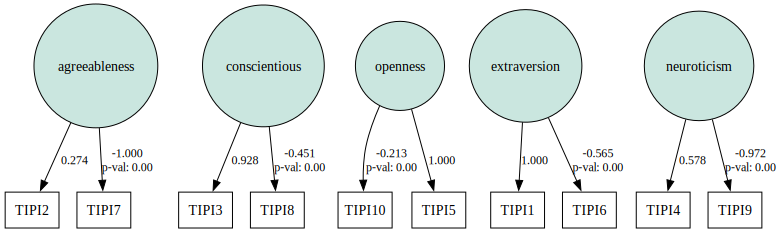

In [9]:
# Show and save
sem.semplot(model, filename='test.png', std_ests=True)

### Interpreting CFA models - fit statistics
While standard GLM's can be interpreted in terms of the quality of their predictions, it is harder to do this with CFA models. CFA models produce a range of 'fit statistics' which describe how well the model we suppose fits the data. We obtain these with the `sem.calc_stats` function on the model, like this:

In [10]:
# Obtain fit statistics
fit_stats = sem.calc_stats(model)
display(fit_stats.T)

,Value
DoF,25.000000
DoF Baseline,45.000000
chi2,6698.393370
chi2 p-value,0.000000
chi2 Baseline,40411.592111
CFI,0.834680
GFI,0.834246
AGFI,0.701642
NFI,0.834246
TLI,0.702425


This array of statistics is confusing, but they all exist in some form to help us interpret how well the model fits the data. Here we highlight the ones that are worth paying attention to, and offer some rules-of-thumb in how to interpret them.

- **DOF, DOF Baseline, chi2, and chi2 p-value** These values tell us whether the model we specify is satisfactorily reproducing the data that goes into it. Specifically, it is looking for the differences between the correlation matrix of all the variables in our observed data, and the correlation matrix of the predictions from the model. If that is large - i.e., the model is doing a bad job of replicating the data - then this test will be *significant*, and this *is a bad thing*. Confusing, I know! This test is however very sensitive to sample size, with larger samples like we have here producing significant results even if the discrepancy is quite small.
- **CFI** This is the *Comparative Fit Index*, which compares the fit of the model we specified to a null model that has no associations amongst variables. This has an established cut-off in the literature - it should be **greater than .90** for a 'good' fit.
- **GFI and AGFI** These are the *(Adjusted) Goodness of Fit* index, which are the CFA equivalent of $R^2$, or how much variance the model can explain in the data that goes into it. These too have cutoffs, and should be **greater than .90 and .95 respectively**.
- **NFI and TLI** The Normed Fit index, and its more conservative version, the Tucker-Lewis Index, are another way to check the discrepancy of the model against a null model by focusing on the chi-square statistic. Again, there is a strong suggestion these values **should be above .95**.
- **RMSEA** The root-mean-square-error of-approximation tells us - much like the RMSE in OLS - what the average amount of error the model gives. As such, a low value is better, and there is also a cutoff here - **it should be less than .06**.

Taken together (and its a lot to take!), this suggests this model is *not a good fit*. In other words, the data do not support the proposed latent factor structure we have suggested. In this case, the standard advice would be to carry out an EFA and see what is going on.

### Another example - CFA models meet regression
Here, we demonstrate how CFA can be used to map observed variables to latent variables, and then see if those latent variables can predict another variable of interest. This sort of CFA - plus - regression approach technically falls under the SEM approach, but it is a useful demonstration of how all of these techniques are connected.

To demonstrate, we'll use a dataset that comes with `semopy`, the Holzinger-Swineford -39 dataset. This classic dataset has a set of scores for seventh and eighth grade students on a a series of mental ability tests (in the dataset, they are `x1` through to `x9`). Interestingly, these tests are supposed to capture three specific latent aspects of intelligence/mental ability - visual, textual, and processing speed.

First let us load the data and examine it:

In [11]:
# Pull the data from the examples
hlz = sem.examples.holzinger39.get_data().dropna(how='any').replace({'sex': {2: 0}})
hlz.head()

,id,sex,ageyr,agemo,school,grade,x1,x2,x3,x4,x5,x6,x7,x8,x9
1,1,1,13,1,Pasteur,7.0,3.333333,7.75,0.375,2.333333,5.75,1.285714,3.391304,5.75,6.361111
2,2,0,13,7,Pasteur,7.0,5.333333,5.25,2.125,1.666667,3.00,1.285714,3.782609,6.25,7.916667
3,3,0,13,1,Pasteur,7.0,4.500000,5.25,1.875,1.000000,1.75,0.428571,3.260870,3.90,4.416667
4,4,1,13,2,Pasteur,7.0,5.333333,7.75,3.000,2.666667,4.50,2.428571,3.000000,5.30,4.861111
5,5,0,12,2,Pasteur,7.0,4.833333,4.75,0.875,2.666667,4.00,2.571429,3.695652,6.30,5.916667


The variables x1 through to x9 represent the tests.
- `x1`, `x2`, `x3` represent visual ability
- `x4`, `x5`, `x6` represent text ability
- `x7`, `x8`, `x9` represent processing speed.
- `sex` represents the sex of the child.

Imagine we wanted to predict the sex of a child given scores on the variables - i.e., could we classify a child's sex given their test scores? With only the observed variables, we would have to run a model like this (ideally a logistic model, but we can use a GLM as an example):


In [12]:
# Observed model only
obs_only = smf.ols('sex ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9',
                   data=hlz).fit()

obs_only.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sex   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.064
No. Observations:                 300   F-statistic:                     3.261
Covariance Type:            nonrobust   Prob (F-statistic):           0.000854
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4374      0.234      1.870      0.063      -0.023       0.898
x1             0.0290      0.030      0.966      0.335      -0.030       0.088
x2             0.0264      0.026      1.009      0.314      -0.025       0.078
x3             0.0791      0.029      2.702      0.007       0.021       0.137
x4            -0.0990      0.039     -2.511      0.013      -0.177      -0.021
x5             0.0145      0.036      0.403      0.687      -0.056       0.085
x6             0.0348      0.040      0.861      0.390      -0.045       0.114
x7            -0.0493      0.031     -1.595      0.112      -0.110       0.012
x8             0.0510      0.034      1.487      0.138      -0.017       0.119
x9            -0.0645      0.034     -1.877      0.062      -0.132       0.003
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We might infer from this that x3 and x4 (tests from visual and text ability) discriminate betwen males and females. This is a difficult interpretation; especially since we know that these variables are manifestations of a latent factor. We could identify those using a CFA in `semopy` like this: 

In [13]:
# Identify latent factors
cfa_model = """
visual =~ x1 + x2 + x3
text =~ x4 + x5 + x6
speed =~ x7 + x8 + x9
"""

# Model
model = sem.Model(cfa_model)
model.fit(hlz)

# Inspect
model.inspect(std_est=True).query('op == "~"')

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,x1,~,visual,1.000000,0.777342,-,-,-
1,x2,~,visual,0.547286,0.421642,0.098837,5.537259,0.0
2,x3,~,visual,0.721594,0.579708,0.107978,6.682768,0.0
3,x4,~,text,1.000000,0.851913,-,-,-
4,x5,~,text,1.110345,0.854666,0.065422,16.972147,0.0
5,x6,~,text,0.924403,0.837303,0.055503,16.655118,0.0
6,x7,~,speed,1.000000,0.571303,-,-,-
7,x8,~,speed,1.179437,0.727401,0.164363,7.175814,0.0
8,x9,~,speed,1.075818,0.663566,0.14983,7.180238,0.0


These look reasonably sensible, what about the fit?

In [14]:
# Get fit
sem.calc_stats(model).T.round(2)

,Value
DoF,24.00
DoF Baseline,36.00
chi2,85.94
chi2 p-value,0.00
chi2 Baseline,918.20
CFI,0.93
GFI,0.91
AGFI,0.86
NFI,0.91
TLI,0.89


Not *too* bad overall, though a mix of different statistics that might suggest that the model isn't a solid fit, but it hints at the fact the three latent variables underpin the scores. We can now expand our CFA model to let the latent variables actually predict the sex of the child, all in one step, like so:

In [15]:
# Identify latent factors
cfa_model = """
# Specifies the latent factors
visual =~ x1 + x2 + x3
text =~ x4 + x5 + x6
speed =~ x7 + x8 + x9

# Uses them to predict sex
sex ~ visual + text + speed
"""

# Model
model = sem.Model(cfa_model)
model.fit(hlz)

# Inspect
model.inspect(std_est=True).query('op == "~"')

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,x1,~,visual,1.000000,0.740218,-,-,-
1,x2,~,visual,0.600939,0.440813,0.102441,5.866185,0.0
2,x3,~,visual,0.796922,0.609516,0.11097,7.181421,0.0
3,x4,~,text,1.000000,0.855219,-,-,-
4,x5,~,text,1.104548,0.853538,0.064873,17.026223,0.0
5,x6,~,text,0.918146,0.835135,0.055047,16.679216,0.0
6,x7,~,speed,1.000000,0.565775,-,-,-
7,x8,~,speed,1.158891,0.707608,0.162125,7.148138,0.0
8,x9,~,speed,1.116640,0.682020,0.156292,7.144581,0.0
9,sex,~,visual,0.200401,0.346385,0.060752,3.298669,0.000971


We can see here that the visual and text latent scores are negative predictors, e.g. as latent scores go up, the likelihood of the scores belonging to one sex or another decreases.

As is hopefully clear, the idea of CFA is quite general - it allows us to specify a set of latent variables, and link them to specific observed variables, testing the goodness of fit of that arrangement. If we want to, we can further expand these models to use the latent variables to predict other variables, just like a standard GLM.